In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome'
donors = np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str)
samples = np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str)
s = samples[0]

gex_methods = ['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'scsplit', 'scsplit_nogenos', 'demuxalot'] 
atac_methods = ['demuxlet', 'freemuxlet',  'vireo', 'vireo_nogenos',
    'souporcell', 'souporcell_nogenos', 'scsplit', 'scsplit_nogenos', 'scavengers']

prop_doub = np.loadtxt(f'{projdir}/ambient/ambisim/prop_doub/txt/experiments.txt', dtype=str)
mux_test = np.loadtxt(f'{projdir}/ambient/ambisim/mux_test/txt/experiments.txt', dtype=str)

pd_mask = ['40' not in x and '50' not in x for x in prop_doub]
mux_mask = ['40' not in x and '50' not in x for x in mux_test]
pd_exps = prop_doub[pd_mask]
mux_exps = mux_test[mux_mask]

pd_prop = [x.split('_')[0] for x in pd_exps]
doub = [x.split('_')[1] for x in pd_exps]
mux = [x.split('_')[0] for x in mux_exps]
mux_prop = [x.split('_')[1] for x in mux_exps]

In [3]:
!ls {projdir}/csv/ambisim/mux_test_gex.csv

ls: cannot access /u/home/t/terencew/project-cluo/igvf/pilot/multiome/csv/ambisim/mux_test_gex.csv: No such file or directory


In [4]:
gex_pd = pd.read_csv(f'{projdir}/csv/ambisim/prop_doub_gex.csv', sep='\t', header=0, index_col=0)
atac_pd = pd.read_csv(f'{projdir}/csv/ambisim/prop_doub_atac.csv', sep='\t', header=0, index_col=0)
gex_mux = pd.read_csv(f'{projdir}/csv/ambisim/mux_gex.csv', sep='\t', header=0, index_col=0)
atac_mux = pd.read_csv(f'{projdir}/csv/ambisim/mux_atac.csv', sep='\t', header=0, index_col=0)

In [5]:
gex_mask = [x in pd_exps for x in gex_pd['exp']]
atac_mask = [x in pd_exps for x in atac_pd['exp']]

gex_pd = gex_pd[gex_mask]
atac_pd = atac_pd[atac_mask]

In [6]:
gex_mask = [x in mux_exps for x in gex_mux['exp']]
atac_mask = [x in mux_exps for x in atac_mux['exp']]

gex_mux = gex_mux[gex_mask]
atac_mux = atac_mux[atac_mask]

In [7]:
column = 'demux_type'
truth_column = 'truth_type'
final_col = 'droplet_acc'
gex_pd[final_col] = gex_pd[column] == gex_pd[truth_column]
atac_pd[final_col] = atac_pd[column] == atac_pd[truth_column]
gex_mux[final_col] = gex_mux[column] == gex_mux[truth_column]
atac_mux[final_col] = atac_mux[column] == atac_mux[truth_column]

In [8]:
### new metric
column = 'donor_id'
truth_column = 'truth'
final_col = 'donor_acc'

gex_pd['donor_acc'] = True
atac_pd['donor_acc'] = True
gex_mux['donor_acc'] = True
atac_mux['donor_acc'] = True

mask = gex_pd['demux_type'] == 'singlet'
tmp = gex_pd[mask]
gex_pd.loc[mask,final_col] = tmp[column] == tmp[truth_column]

mask = atac_pd['demux_type'] == 'singlet'
tmp = atac_pd[mask]
atac_pd.loc[mask,final_col] = tmp[column] == tmp[truth_column]

mask = gex_mux['demux_type'] == 'singlet'
tmp = gex_mux[mask]
gex_mux.loc[mask,final_col] = tmp[column] == tmp[truth_column]

mask = atac_mux['demux_type'] == 'singlet'
tmp = atac_mux[mask]
atac_mux.loc[mask,final_col] = tmp[column] == tmp[truth_column]

In [40]:
gex_pd_drop_acc = pd.DataFrame(index=pd_exps, columns=gex_methods)
t = samples[0]
for exp in pd_exps:
#     print(exp)
    mask = gex_pd['exp'] == exp
    exp_gex = gex_pd[mask]
    for method in gex_methods:
        mask = exp_gex['method'] == method
        method_gex = exp_gex[mask]
        mask = method_gex['sample'] == t
        sample_gex = method_gex[mask]
        gex_pd_drop_acc.loc[exp, method] = np.sum(sample_gex['droplet_acc']) / sample_gex.shape[0]
gex_pd_drop_acc = gex_pd_drop_acc.transpose().astype('float')

In [41]:
atac_pd_drop_acc = pd.DataFrame(index=pd_exps, columns=atac_methods)
t = samples[0]
for exp in pd_exps:
#     print(exp)
    mask = atac_pd['exp'] == exp
    exp_atac = atac_pd[mask]
    for method in atac_methods:
        mask = exp_atac['method'] == method
        method_atac = exp_atac[mask]
        mask = method_atac['sample'] == t
        sample_atac = method_atac[mask]
        atac_pd_drop_acc.loc[exp, method] = np.sum(sample_atac['droplet_acc']) / sample_atac.shape[0]
atac_pd_drop_acc = atac_pd_drop_acc.transpose().astype('float')

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [42]:
gex_mux_drop_acc = pd.DataFrame(index=mux_exps, columns=gex_methods)
t = samples[0]
for exp in mux_exps:
#     print(exp)
    mask = gex_mux['exp'] == exp
    exp_gex = gex_mux[mask]
    for method in gex_methods:
        mask = exp_gex['method'] == method
        method_gex = exp_gex[mask]
        mask = method_gex['sample'] == t
        sample_gex = method_gex[mask]
        gex_mux_drop_acc.loc[exp, method] = np.sum(sample_gex['droplet_acc']) / sample_gex.shape[0]
gex_mux_drop_acc = gex_mux_drop_acc.transpose().astype('float')

In [43]:
atac_mux_drop_acc = pd.DataFrame(index=mux_exps, columns=atac_methods)
t = samples[0]
for exp in mux_exps:
#     print(exp)
    mask = atac_mux['exp'] == exp
    exp_atac = atac_mux[mask]
    for method in atac_methods:
        mask = exp_atac['method'] == method
        method_atac = exp_atac[mask]
        mask = method_atac['sample'] == t
        sample_atac = method_atac[mask]
        atac_mux_drop_acc.loc[exp, method] = np.sum(sample_atac['droplet_acc']) / sample_atac.shape[0]
atac_mux_drop_acc = atac_mux_drop_acc.transpose().astype('float')

In [44]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
doub_ticks = np.tile(['0', '10', '20', '30'], 4)
font_size = 20

In [45]:
# tmp_ticks = list(np.repeat('', 8)) + ['scavengers']
# tmp_ticks

In [46]:
# fig, axes = plt.subplots(1, figsize=(12, 6))  # 2 rows, 4 columns
# sns.heatmap(gex_pd_acc, cmap=cmap, xticklabels=doub_ticks, yticklabels=tmp_ticks, cbar=False)
# plt.tick_params(axis='both', which='major',
#                 labelsize=font_size, labelbottom = False, bottom=False, top = False, labeltop=False,
#                 labelright=True, labelleft=False, left=False)
# plt.yticks(rotation=0)

<AxesSubplot:>

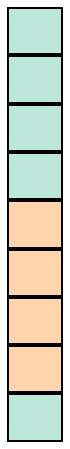

In [47]:
rna_genofree= pd.DataFrame([0, 0, 0, 0, 1, 1, 1, 1, 0])
fig, axes = plt.subplots(1, figsize=(1, 8))  # 2 rows, 4 columns
sns.heatmap(rna_genofree, cbar=False,
            xticklabels='', yticklabels='', cmap='icefire',
            linewidths=4,linecolor='black')

<AxesSubplot:>

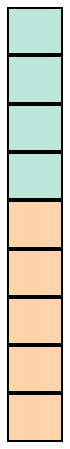

In [48]:
atac_genofree= pd.DataFrame([0, 0, 0, 0, 1, 1, 1, 1, 1])
fig, axes = plt.subplots(1, figsize=(1, 8))  # 2 rows, 4 columns
sns.heatmap(atac_genofree, cbar=False,
            xticklabels='', yticklabels='', cmap='icefire',
            linewidths=4,linecolor='black')

(array([], dtype=float64), [])

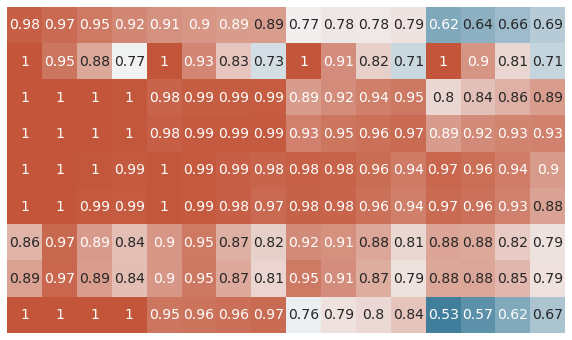

In [49]:
fig, axes = plt.subplots(1, figsize=(10, 6))  # 2 rows, 4 columns
sns.heatmap(gex_pd_drop_acc, annot=True, cmap=cmap, xticklabels='', yticklabels='', cbar=False, annot_kws={'size': 14})
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

<AxesSubplot:>

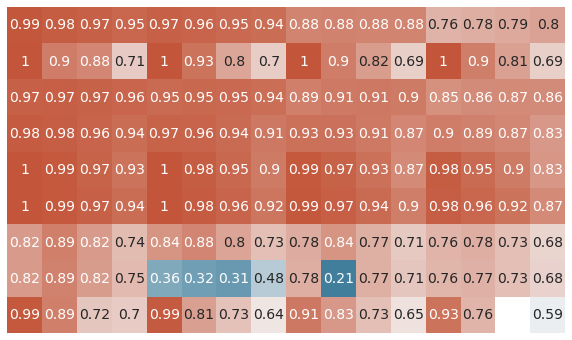

In [50]:
fig, axes = plt.subplots(1, figsize=(10, 6))  # 2 rows, 4 columns
sns.heatmap(atac_pd_drop_acc, annot=True, cmap=cmap, xticklabels='', 
            yticklabels='', cbar=False, annot_kws={'size': 14})

<AxesSubplot:>

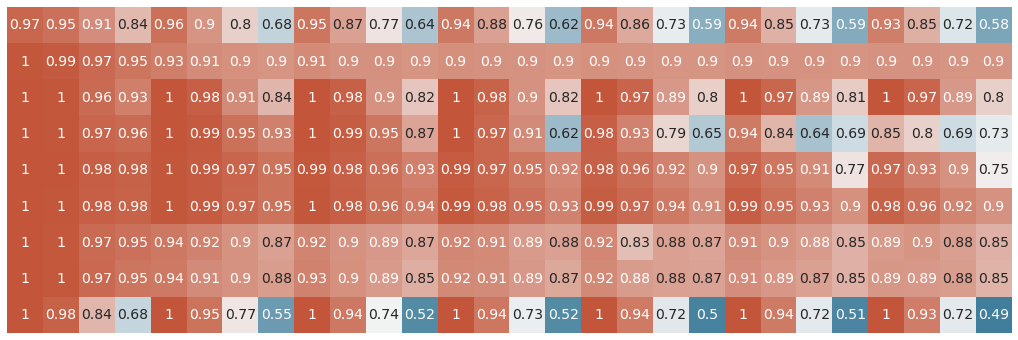

In [51]:
fig, axes = plt.subplots(1, figsize=(18, 6))  # 2 rows, 4 columns
sns.heatmap(gex_mux_drop_acc, annot=True, cmap=cmap, xticklabels='', 
            yticklabels='', cbar=False, annot_kws={'size': 14})

<AxesSubplot:>

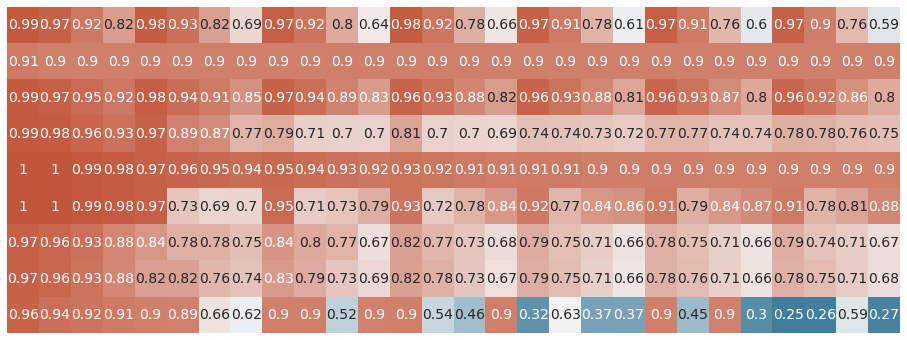

In [52]:
fig, axes = plt.subplots(1, figsize=(16, 6))  # 2 rows, 4 columns
sns.heatmap(atac_mux_drop_acc, annot=True, cmap=cmap, xticklabels='', 
            yticklabels='', cbar=False, annot_kws={'size': 14})

### indiv acc

In [22]:
gex_pd_indiv_acc = pd.DataFrame(index=pd_exps, columns=gex_methods)
t = samples[0]
for exp in pd_exps:
#     print(exp)
    mask = gex_pd['exp'] == exp
    exp_gex = gex_pd[mask]
    for method in gex_methods:
        mask = exp_gex['method'] == method
        method_gex = exp_gex[mask]
        mask = method_gex['sample'] == t
        sample_gex = method_gex[mask]
        gex_pd_indiv_acc.loc[exp, method] = np.sum(sample_gex['donor_acc']) / sample_gex.shape[0]
gex_pd_indiv_acc = gex_pd_indiv_acc.transpose().astype('float')

In [56]:
gex_pd_indiv_acc

,0_0,0_10,0_20,0_30,10_0,10_10,10_20,10_30,20_0,20_10,20_20,20_30,30_0,30_10,30_20,30_30
demuxlet,0.999652,0.979497,0.959865,0.936421,0.997556,0.979049,0.959721,0.947645,0.994441,0.980012,0.959359,0.945713,0.988216,0.977066,0.959544,0.948069
freemuxlet,1.000000,0.951538,0.875860,0.765166,1.000000,0.925377,0.831921,0.727146,0.999527,0.915435,0.815644,0.712833,0.997262,0.903129,0.804366,0.706595
vireo,1.000000,0.999767,0.998833,0.997200,1.000000,0.999647,0.998143,0.996385,0.999882,0.998817,0.996937,0.995506,1.000000,0.998567,0.995966,0.993464
vireo_nogenos,1.000000,0.999767,0.998483,0.996617,1.000000,0.999058,0.997562,0.994053,1.000000,0.997516,0.994699,0.987936,0.999643,0.996536,0.988492,0.975639
souporcell,1.000000,0.998835,0.996616,0.992184,1.000000,0.996234,0.987812,0.977962,0.999763,0.990893,0.973495,0.949852,0.999524,0.982203,0.955511,0.907784
souporcell_nogenos,1.000000,0.998719,0.994400,0.990667,1.000000,0.995645,0.987115,0.972598,1.000000,0.991130,0.970668,0.945358,0.999405,0.979814,0.952070,0.899228
scsplit,1.000000,0.971226,0.894528,0.842277,0.999884,0.952448,0.870807,0.820546,0.999645,0.946777,0.903640,0.825665,0.996191,0.947802,0.877210,0.827689
scsplit_nogenos,1.000000,0.972973,0.891611,0.843910,0.999884,0.955979,0.881021,0.817514,0.999290,0.946659,0.896101,0.817031,0.996786,0.948519,0.905920,0.830897
demuxalot,1.000000,0.999651,0.999533,0.998717,1.000000,0.999882,0.999768,0.999650,1.000000,1.000000,0.999647,0.999172,0.999881,0.999881,0.999288,0.998336


In [23]:
atac_pd_indiv_acc = pd.DataFrame(index=pd_exps, columns=atac_methods)
t = samples[0]
for exp in pd_exps:
#     print(exp)
    mask = atac_pd['exp'] == exp
    exp_atac = atac_pd[mask]
    for method in atac_methods:
        mask = exp_atac['method'] == method
        method_atac = exp_atac[mask]
        mask = method_atac['sample'] == t
        sample_atac = method_atac[mask]
        atac_pd_indiv_acc.loc[exp, method] = np.sum(sample_atac['donor_acc']) / sample_atac.shape[0]
atac_pd_indiv_acc = atac_pd_indiv_acc.transpose().astype('float')

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [57]:
gex_mux_indiv_acc = pd.DataFrame(index=mux_exps, columns=gex_methods)
t = samples[0]
for exp in mux_exps:
#     print(exp)
    mask = gex_mux['exp'] == exp
    exp_gex = gex_mux[mask]
    for method in gex_methods:
        mask = exp_gex['method'] == method
        method_gex = exp_gex[mask]
        mask = method_gex['sample'] == t
        sample_gex = method_gex[mask]
        gex_mux_indiv_acc.loc[exp, method] = np.sum(sample_gex['donor_acc']) / sample_gex.shape[0]
gex_mux_indiv_acc = gex_mux_indiv_acc.transpose().astype('float')

In [58]:
atac_mux_indiv_acc = pd.DataFrame(index=mux_exps, columns=atac_methods)
t = samples[0]
for exp in mux_exps:
#     print(exp)
    mask = atac_mux['exp'] == exp
    exp_atac = atac_mux[mask]
    for method in atac_methods:
        mask = exp_atac['method'] == method
        method_atac = exp_atac[mask]
        mask = method_atac['sample'] == t
        sample_atac = method_atac[mask]
        atac_mux_indiv_acc.loc[exp, method] = np.sum(sample_atac['donor_acc']) / sample_atac.shape[0]
atac_mux_indiv_acc = atac_mux_indiv_acc.transpose().astype('float')

<AxesSubplot:>

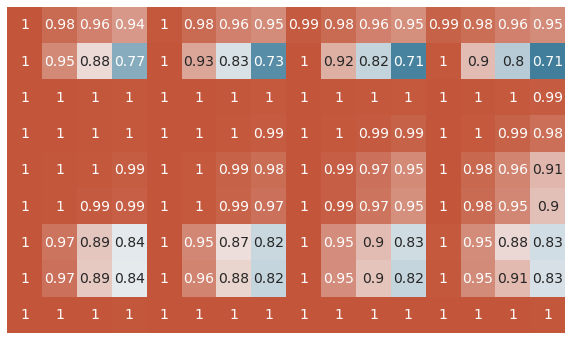

In [26]:
fig, axes = plt.subplots(1, figsize=(10, 6))  # 2 rows, 4 columns
sns.heatmap(gex_pd_indiv_acc, annot=True, cmap=cmap, xticklabels='', yticklabels='', cbar=False, annot_kws={'size': 14})

<AxesSubplot:>

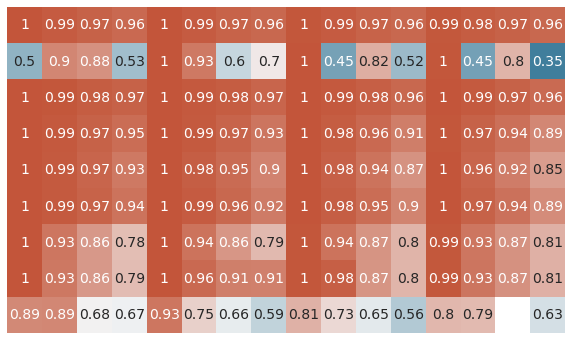

In [27]:
fig, axes = plt.subplots(1, figsize=(10, 6))  # 2 rows, 4 columns
sns.heatmap(atac_pd_indiv_acc, annot=True, cmap=cmap, xticklabels='', 
            yticklabels='', cbar=False, annot_kws={'size': 14})

<AxesSubplot:>

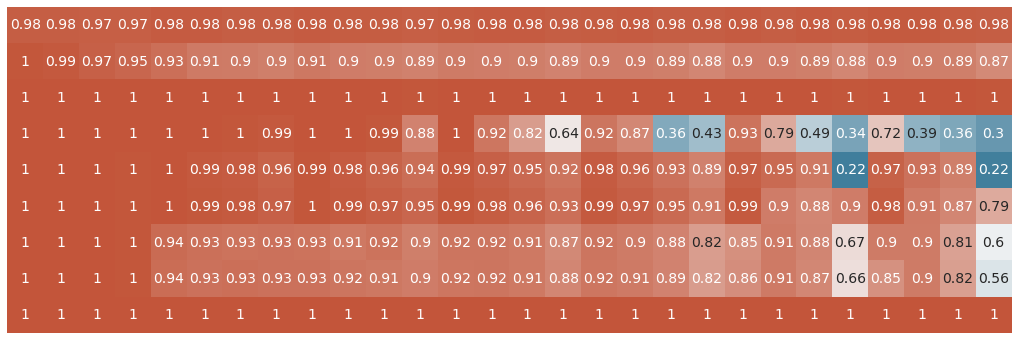

In [59]:
fig, axes = plt.subplots(1, figsize=(18, 6))  # 2 rows, 4 columns
sns.heatmap(gex_mux_indiv_acc, annot=True, cmap=cmap, xticklabels='',
            yticklabels='', cbar=False, annot_kws={'size': 14})

<AxesSubplot:>

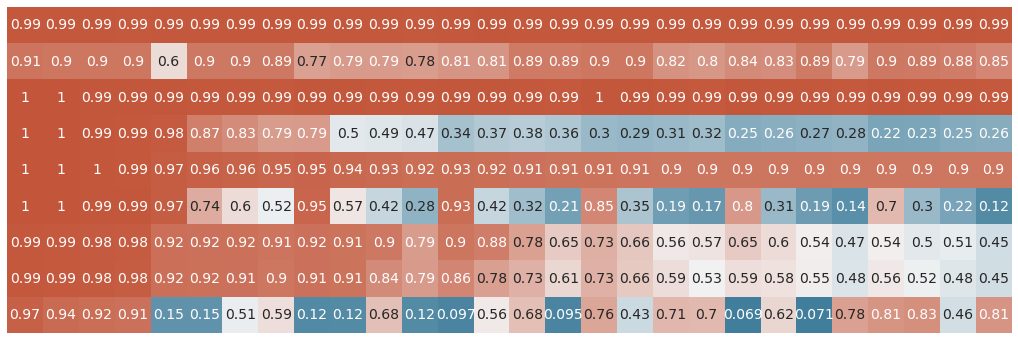

In [60]:
fig, axes = plt.subplots(1, figsize=(18, 6))  # 2 rows, 4 columns
sns.heatmap(atac_mux_indiv_acc, annot=True, cmap=cmap, xticklabels='',
            yticklabels='', cbar=False, annot_kws={'size': 14})

In [63]:
gex_pd_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure3/gex_pd_drop_acc.csv',
                       sep='\t', header=True, index=True)
atac_pd_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure3/atac_pd_drop_acc.csv',
                       sep='\t', header=True, index=True)
gex_mux_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure3/gex_mux_drop_acc.csv',
                       sep='\t', header=True, index=True)
atac_mux_drop_acc.to_csv(f'{projdir}/csv/final_figures/figure3/atac_mux_drop_acc.csv',
                       sep='\t', header=True, index=True)

In [64]:
gex_pd_indiv_acc.to_csv(f'{projdir}/csv/final_figures/figure3/gex_pd_indiv_acc.csv',
                       sep='\t', header=True, index=True)
atac_pd_indiv_acc.to_csv(f'{projdir}/csv/final_figures/figure3/atac_pd_indiv_acc.csv',
                       sep='\t', header=True, index=True)
gex_mux_indiv_acc.to_csv(f'{projdir}/csv/final_figures/figure3/gex_mux_indiv_acc.csv',
                       sep='\t', header=True, index=True)
atac_mux_indiv_acc.to_csv(f'{projdir}/csv/final_figures/figure3/atac_mux_indiv_acc.csv',
                       sep='\t', header=True, index=True)